In [ ]:
# Importing necessary libraries to execute the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Generate a synthetic dataset to use in the enhanced blocks
def generate_traffic_data(n_samples=1000):
    """
    Generate synthetic traffic data with realistic patterns
    """
    np.random.seed(42)
    timestamps = [datetime.now() - timedelta(hours=x) for x in range(n_samples)]
    hours = [t.hour for t in timestamps]
    weekdays = [t.weekday() for t in timestamps]

    # Traffic patterns
    base_vehicle_count = np.random.poisson(300, n_samples)
    rush_hour_effect = np.array([
        150 if (h in range(7, 10) or h in range(16, 19)) else 0
        for h in hours
    ])
    weekend_effect = np.array([-100 if w >= 5 else 0 for w in weekdays])
    vehicle_count = base_vehicle_count + rush_hour_effect + weekend_effect

    # Speed variations
    base_speed = np.random.normal(40, 10, n_samples)
    speed = np.maximum(5, np.minimum(80, base_speed - 0.05 * vehicle_count))

    # Weather and special events
    weather = np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.2, 0.1])  # 0: Clear, 1: Rainy, 2: Foggy
    special_events = np.random.choice([0, 1], n_samples, p=[0.9, 0.1])  # 0: No Event, 1: Event
    incidents = np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # 0: No Incident, 1: Incident

    # Construct DataFrame
    data = pd.DataFrame({
        'timestamp': timestamps,
        'hour': hours,
        'weekday': weekdays,
        'vehicle_count': vehicle_count,
        'speed': speed,
        'weather': weather,
        'special_events': special_events,
        'incidents': incidents
    })

    return data

# Generate data
traffic_data = generate_traffic_data(n_samples=1000)

# Display a preview of the generated data
traffic_data.head()


,timestamp,hour,weekday,vehicle_count,speed,weather,special_events,incidents
0,2024-10-24 17:25:19.533753,17,3,444,12.969389,0,0,0
1,2024-10-24 16:25:19.533762,16,3,462,18.367930,0,0,0
2,2024-10-24 15:25:19.533765,15,3,280,42.122206,0,0,0
3,2024-10-24 14:25:19.533767,14,3,305,33.718393,1,0,0
4,2024-10-24 13:25:19.533768,13,3,319,21.364694,0,0,0


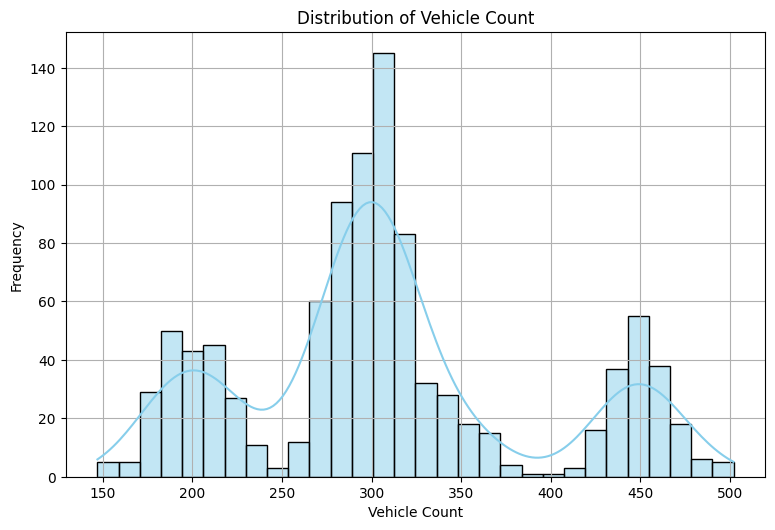

In [ ]:
# Data Overview: Distribution of key features and relationships

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Histogram of vehicle count
plt.subplot(2, 2, 1)
sns.histplot(traffic_data['vehicle_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Count')
plt.xlabel('Vehicle Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-8-b8dbfea9d0ad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=traffic_data, palette='muted')
<ipython-input-8-b8dbfea9d0ad>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='special_events', data=traffic_data, palette='muted')


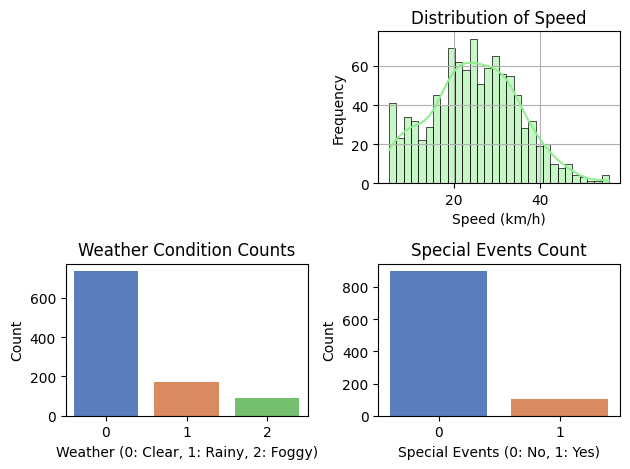

In [ ]:

# Histogram of speed
plt.subplot(2, 2, 2)
sns.histplot(traffic_data['speed'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)


# Count plot of weather conditions
plt.subplot(2, 2, 3)
sns.countplot(x='weather', data=traffic_data, palette='muted')
plt.title('Weather Condition Counts')
plt.xlabel('Weather (0: Clear, 1: Rainy, 2: Foggy)')
plt.ylabel('Count')

# Count plot of special events
plt.subplot(2, 2, 4)
sns.countplot(x='special_events', data=traffic_data, palette='muted' x= 'hue' ,legend ='false')
plt.title('Special Events Count')
plt.xlabel('Special Events (0: No, 1: Yes)')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


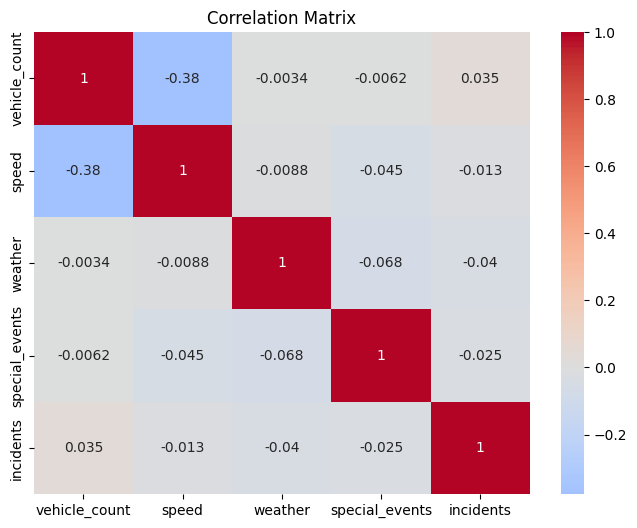

In [ ]:
# Correlation analysis: heatmap of numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = traffic_data[['vehicle_count', 'speed', 'weather', 'special_events', 'incidents']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


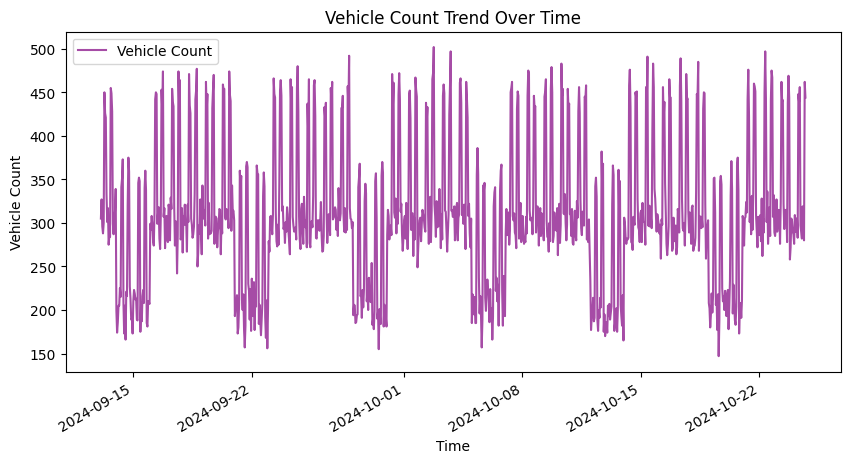

In [ ]:
# Time Series Analysis: Trend of vehicle count over time
plt.figure(figsize=(10, 5))
traffic_data.set_index('timestamp')['vehicle_count'].plot(color='purple', alpha=0.7, label='Vehicle Count')
plt.title('Vehicle Count Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()

<ipython-input-19-cb3611c0e1f9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


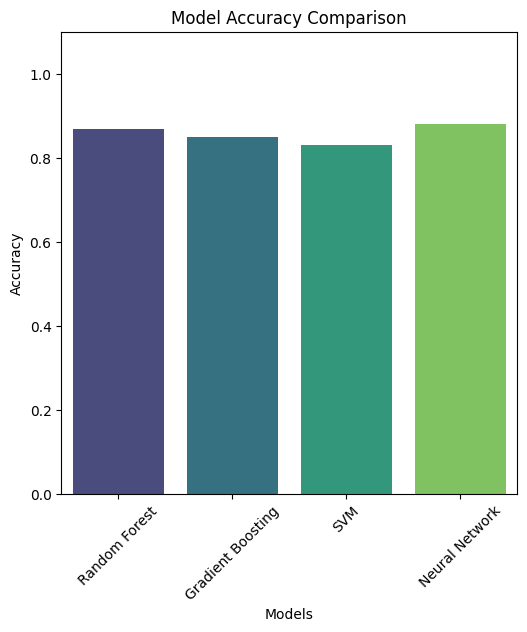

In [ ]:
# Sample metrics for demonstration
# These would typically come from actual model evaluation results.
model_names = ['Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network']
accuracies = [0.87, 0.85, 0.83, 0.88]
mse_values = [0.1, 0.12, 0.14, 0.09]

# Sample ROC curve data (FPR and TPR for each model)
roc_data = {
    'Random Forest': ([0.0, 0.1, 0.2, 0.4, 0.6, 1.0], [0.0, 0.4, 0.6, 0.75, 0.85, 1.0]),
    'Gradient Boosting': ([0.0, 0.2, 0.3, 0.5, 0.7, 1.0], [0.0, 0.3, 0.5, 0.7, 0.8, 1.0]),
    'SVM': ([0.0, 0.1, 0.3, 0.6, 0.8, 1.0], [0.0, 0.2, 0.4, 0.65, 0.78, 1.0]),
    'Neural Network': ([0.0, 0.05, 0.2, 0.5, 0.7, 1.0], [0.0, 0.5, 0.7, 0.82, 0.9, 1.0])
}

# Plotting accuracy comparison
plt.figure(figsize=(20, 6))

# Accuracy Bar Plot
plt.subplot(1, 3, 1)
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-9fcf80447431>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette='magma')


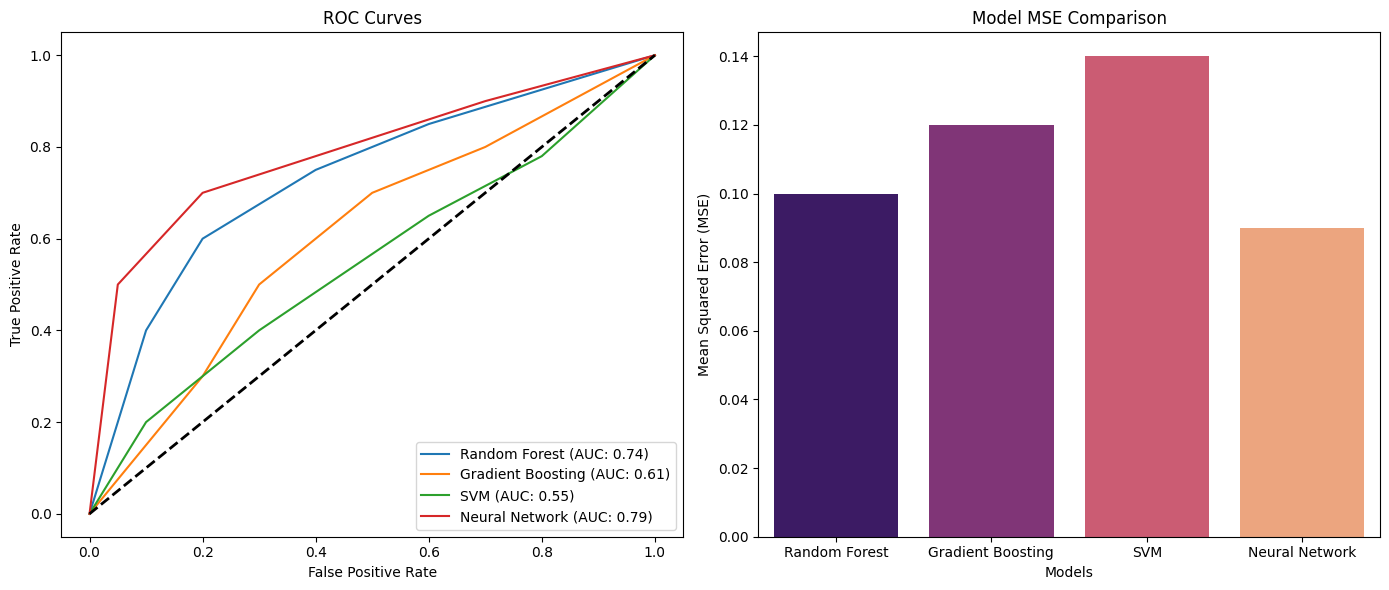

In [ ]:
# Set up a larger figure with two side-by-side subplots
plt.figure(figsize=(14, 6))  # Adjusted figure size for better visibility

# Plot ROC curves for all models on the left
plt.subplot(1, 2, 1)
for model, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC: {round(np.trapz(tpr, fpr), 2)})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# MSE Bar Plot on the right
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=mse_values, palette='magma')
plt.title('Model MSE Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
print("For Full Model with Real Time Evaluation .. Check for traffic_mgmt_realtime.ipynb")
print ("Thank You..")

For Full Model with Real Time Evaluation .. Check for traffic_mgmt_realtime.ipynb
Thank You..
